# Project 2. Investigating Medical Appointments in Brazil: Predicting Attendance

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

---------------------------------------------------------------------------------

<a id='intro'></a>
## Introduction

<p>This dataset is a collection of information from 110,528 medical patients in Brazil, focused on whether patients arrived for their appointment or not, and patient data that may play a role in attendance.</p>

<p>What factors are important in predicting if a patient will show up for their scheduled appointment? This includes:</p>
<ul>
    <li>Does gender and/or age play a role in attendance?</li>
    <li>Does scheduling an appointment far in advance result in more or less patients attending their appointments?</li>
    <li>Does having a handicap factor into attendance?</li>
    <li>How do medical conditions affect a patient's attendance? Many patients have either hypertension, diabetes, alcoholism, or all three.</li>
    <li>What is the overall percentage of patients who did/didn't attend their appointment?</li>
</ul>


<p> The data characteristics I will be working with are are below (included are my initial thoughts on how to explore each category):</p>
<ul>
<li>PatientId - a unique identifier for each individual</li>
    <ul>
        <li>There may be duplicate patientid #'s to show the same person with multiple appointments</li>
    </ul>
<li>AppointmentId - a unique identifier for an appointment</li> 
    <ul>
    <li> There shouldn't be any duplicates</li>
    </ul>    
<li>Gender</li>
    <ul>
    <li>Can compare attendance for males vs. females</li>
    </ul>
<li>ScheduledDay - the date time group for the scheduled appointment</li>
    <ul>
    <li>I may need to change the format</li>
    </ul>
<li>AppointmentDay - actual day of the appointment</li>
    <ul>
        <li>I can determine the number of days that have passed since the appointment was scheduled and if this is a factor in attendance</li>
    </ul>
<li>Age - ranges from 0 years old all the way to 115 years old!</li>
   <ul>
      <li>Age can be compared against medical condition(s) to see if that also plays a factor in attendance</li>
    </ul>
<li>Scholarship - if a patient is enrolled in the Brasilian welfare program, Bolsa Família.</li>
    <ul>
      <li>Having the finances to cover medical appointments, let alone treatments, could be an important factor in attendance.</li>
    </ul>
<li>Medial conditions - hypertension, diabetes, alcoholism, and handicap</li>
    <ul>
        <li>I can compare these to the other data points I mentioned above including age, scholarship, and use of text message, to determine whether patients with medical conditions were more or less likely to attend their appointment.</li>
    </ul>
<li>SMS_received - if patients did, or did not, get a text message reminder for their appointment</li>
    <ul>
      <li>Use of technology can certainly help remind patients of their appointment, however factors such as age, or even location, may affect use of technology.</li>
    </ul>
</ul>


<p>My analysis will focus on whether a patient arrived at their appointment or not. My independent variables include time between scheduling their appointment and the appointment date, age of the patients, medical condition(s) of the patient, and if a text message was received (or not). I will not analyze neighborhood data or handicap data for this analysis..</p>

In [1]:
#Setting up import statements for the packages I plan to use

import datetime as dt
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
jtplot.style(theme='onedork')

---------------------------------------------------------------------------------

<a id='wrangling'></a>
## Data Wrangling: Gather, Assess, Clean

<p>In this section I am loading the data, checking for cleanliness, and possibly trimming and cleaning my dataset for analysis.</p>

### Gather and Assess

In [2]:
# Loading the data and printing off the first 5 lines. 
df = pd.read_csv('No_Show_Appt.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,3.196320e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
1,3.196320e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
2,3.196320e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
3,9.816960e+12,5768785,F,2016-06-03T08:01:28Z,2016-06-03T00:00:00Z,36,AEROPORTO,0,0,0,0,0,0,No
4,4.672740e+12,5668760,M,2016-05-06T09:41:40Z,2016-05-06T00:00:00Z,51,AEROPORTO,0,0,0,0,0,0,No


In [3]:
df.shape

(110527, 14)

<p>There are a total of 110527 entries (as mentioned in my description) and 14 columns.</p>

In [4]:
#Inspecting data types and looking for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#List of the columns I am working with
for i, v in enumerate(df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


<p>What luck! There are no missing values in my dataset. At this time, I wil keep all columns of data to use in my analysis.</p>

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<p>When I was writing out my description I did a deep dive into the data from a high-level perspective. Now that I ran the describe() function on the dataframe I can take a closer look at statistical trends. For instance, the mean age is 37 years, but the rate of alcoholism is pretty low at 3%. 

<p>For curiousity sake, let's quickly look at the Alcoholism column:</p>

In [7]:
df.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [8]:
# Basic math in Python which is easier than opening up my calculator
(3360 / 107167) * 100

3.135293513861543

<p>So only a small percentage of patients consider themselves alcoholics. I will come back to this in the Exploratory Data Analysis section.</p>

------------------------

### Clean

<p>Now that we understand the structure of the dataset there is just some minor cleaning to do</p>

In [9]:
#Checking for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
#Checking for duplicates..
df.duplicated().sum()

0

<p>Since there are no duplicates, I will drop the PatientId column, and work with the AppointmentID column instead.</p>

In [11]:
df.drop('PatientId', axis=1, inplace=True)
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
1,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
2,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
3,5768785,F,2016-06-03T08:01:28Z,2016-06-03T00:00:00Z,36,AEROPORTO,0,0,0,0,0,0,No
4,5668760,M,2016-05-06T09:41:40Z,2016-05-06T00:00:00Z,51,AEROPORTO,0,0,0,0,0,0,No


In [12]:
#Saving file with dropped column as new version
df.to_csv('No_Show_Appt_v1.csv', index=False)

In [13]:
#Cleaning up column headers
df.rename(columns= {'Neighbourhood': 'Neighborhood','Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace=True)

# See if it worked: 
#df.head()
# It worked!

In [14]:
#Cleaning up Age column - I saw a negative value in my initial observations
df.Age.unique()

array([115,  36,  51,  58,  59,  62,  64,   0,  98,  97,  96,  95,   1,
        94,   2,  93,   3,  92,   4,   5,   6,   7,  91,   8,   9,  10,
        90,  11,  12,  13,  89,  14,  15,  16,  17,  18,  19,  20,  88,
        21,  22,  23,  24,  87,  25,  26,  27,  28,  29,  30,  31,  86,
        32,  33,  34,  35,  37,  38,  39,  85,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  84,  50,  52,  53,  54,  55,  56,  57,
        60,  61,  83,  63,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  82,  79,  80,  81, 100, 102,  -1,  99],
      dtype=int64)

In [15]:
#Clean up Age column - remove anything that is -1
df = df.drop(df.index[df.Age == -1])
df.shape

(110526, 13)

In [16]:
#Cleaning up DTG columns - set both to datetime (from object)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

#See if that worked
#df.info()
#It did!

In [17]:
#Add a new column for days between a patient's scheduled appointment and actual appointment
df['Appt_wait'] = df['AppointmentDay'] - df['ScheduledDay']
df['Appt_wait'] = df['Appt_wait'].dt.days

#Checking to see the data in the new column
#df.Appt_wait.head(20)
#df.Appt_wait.tail(15)
#df.Appt_wait.head(40-50)
df.Appt_wait.describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Appt_wait, dtype: float64

<p>The average wait time between scheduling an appointment and the appointment date is 10 days. I see there is some additional cleaning that needs to be done though - there is a minimum wait time of -6 which doesn't make sense, and a maximum wait time of 179 days which I will leave for now.</p>

In [18]:
#Getting rid of the negative values
appt_neg = df[df['Appt_wait'] < 0]
df.drop(appt_neg.index, axis=0, inplace=True)
df.Appt_wait.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Appt_wait, dtype: float64

<p>Appointment wait time minimum is now 0, and the maximum wait time is 179 days. This removes 5 rows of data.</p>

In [19]:
#Saving file with edits as new version
df.to_csv('No_Show_Appt_v2.csv', index=False)

<p>Alright, I've cleaned up the column headers, the age column, the datetime columns, and the No_show column.I think everything we need to be a numerical value (for plotting purposes) is good. I can always return to the Cleaning step if I need during the EDA process.</p>

--------------------

<a id='eda'></a>
## Exploratory Data Analysis

<p>I've trimmed and cleaned my data, now it's time to explore it!</p>
<p> I plan on exploring the following factors for appointment attendance further (left to right in the csv file): </p>
<ul>
    <li>Total No Show Percentage</li>
    <li>Gender</li>
    <li>Appointment Wait Time</li>
    <li>Age</li>
    <li>Medical Conditions</li>
    <li>Technology Usage</li>
</ul>

-------------------------------

#### Total No Show Percentage

<p>I interpreted the 'Yes' in the No_show column to mean a patient was indeed a no show for their appointment. I interpreted the 'No' to mean the patient did attend their appointment.</p>

In [46]:
df.No_show.describe()

count     110521
unique         2
top           No
freq       88207
Name: No_show, dtype: object

In [47]:
No_Bar = df.No_show.value_counts()
No_Bar

No     88207
Yes    22314
Name: No_show, dtype: int64

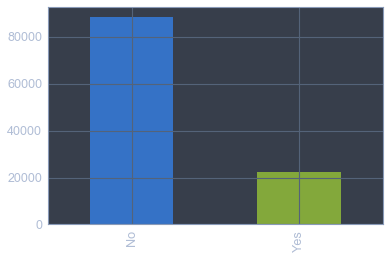

In [48]:
No_Bar.plot(kind='bar');

In [49]:
No_Percent = df.No_show.value_counts('No_show')*100
No_Percent

No     79.810172
Yes    20.189828
Name: No_show, dtype: float64

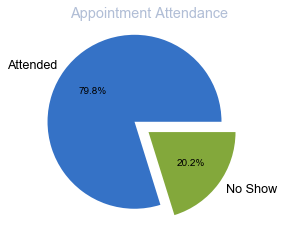

In [89]:
#No_Percent.plot(kind='pie');
no_show_percent = df.No_show.value_counts()
labels = ['Attended', 'No Show']
explode = (0.2, 0)

plt.pie(no_show_percent, labels = labels, explode = explode, autopct= '%1.1f%%', counterclock=True, textprops={'color':'black'});
plt.title('Appointment Attendance');

<p>Total attended appointments is far greater than the number of appointments that patients did not show up for. The first implication is the overall concern that patients aren't attending the appointments they are scheduing. The second implication is the underlying reasons for not attending an appointment must be important enough for patients to priortize those things, rather than the reason for scheduling an appointment. Lastly this implies changes need to be made to the scheduling system to change the number of appointments attended. This data set did not include monetary, time, or personnel data that reflects this no show data, but it is important to note that there could be significant savings in monetary, time, and personnel resources if patients either attended their appointments as scheduled, or only scheduled appointments they were likely to attend.</p>

#### Gender

In [20]:
#Get some initial description on the gender column
df.Gender.describe()

count     110521
unique         2
top            F
freq       71836
Name: Gender, dtype: object

In [21]:
df.Gender.value_counts()

F    71836
M    38685
Name: Gender, dtype: int64

In [22]:
71839 - 38687

33152

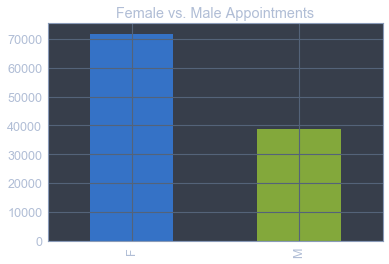

In [23]:
#Setting the numerical value to a variable so I can graph Female vs. Male counts
df_Gender = df.Gender.value_counts()
df_Gender.plot(kind='bar', title='Female vs. Male Appointments');

<p>There is a significantly larger portion of females who had an appointment: females represent 65% of total appointments in this data set, totalling 33,152 more female patients than male patients.</p>

#### Gender and Appointment Attendance 

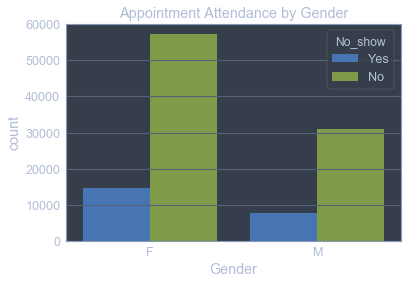

In [24]:
Gender_No_Show = sns.countplot(x = df.Gender, hue = df.No_show);
Gender_No_Show.set_title('Appointment Attendance by Gender');

<p>As shown by the count plot histogram, the 65% of total appointments scheduled by females also (quite significantly) showed up for their appointments. Out of the patients who did not attend their appointment, females were more likely than males to be a no show.</p>

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Appointment Wait Time

In [25]:
df.Appt_wait.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Appt_wait, dtype: float64

In [65]:
#Use bins and labels to get a count within each wait time range
bins = [0, 1, 8, 15, 31, 61, 200]
labels = ['Same Day Appt', '1-7 days', '8-14 days', '15-30 days', '31-60 days', 'More than 60 days']
Describe_Wait = pd.cut(df.Appt_wait, bins, right=False, labels=labels)
df['Wait_Description'] = Describe_Wait
df.Wait_Description.value_counts()

Same Day Appt        38562
1-7 days             32185
15-30 days           17371
8-14 days            12025
31-60 days            8283
More than 60 days     2095
Name: Wait_Description, dtype: int64

In [67]:
Wait = df['Wait_Description'].value_counts()

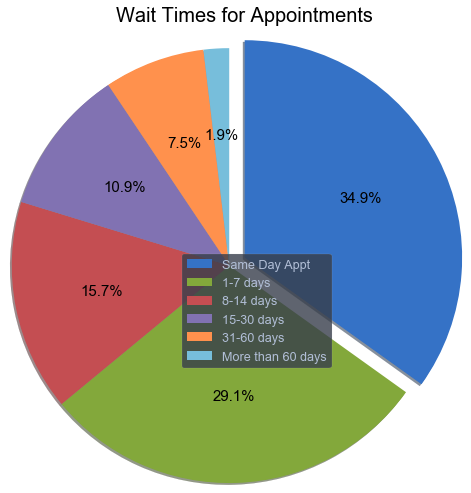

In [71]:
#We can plot this in a more understandable way - I am choosing to visualize appointment times with a pie chart
times = Wait
labels = ['Same Day Appt', '1-7 days', '8-14 days', '15-30 days', '31-60 days', 'More than 60 days']
explode = (0.2, 0, 0, 0, 0, 0)

plt.pie(times, 
        explode = explode, 
        startangle=90, 
        radius = 2.5, 
        autopct='%1.1f%%', 
        counterclock = False, 
        shadow = True,
        textprops={'size': '15', 'color': 'black'})
#plt.title('Wait Times for Appointments')
plt.figtext(0.25, 1.35, 'Wait Times for Appointments', fontsize=20, color='black')
plt.legend(labels, loc = 'lower right')
plt.show()

<p>This pie chart reveals that over half of appointments were scheduled on the same day, or within 1-7 days. The other half vary between 8-14 days, 15-30 days, and 31-60 days, with a small portion of appointments scheduled out greater than 60 days.</p>

#### Appointment Wait Time and Attendance

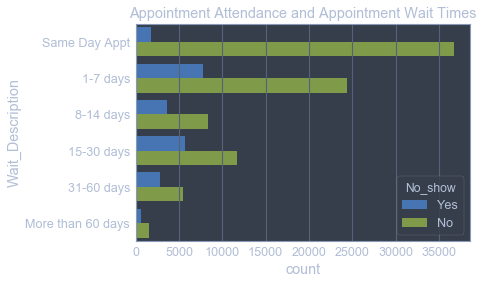

In [28]:
Appt_No_Show = sns.countplot(y = df.Wait_Description, hue = df.No_show);
Appt_No_Show.set_title('Appointment Attendance and Appointment Wait Times');

<p>The pie chart helped visualize the spread between appointments scheduled on the same day, within the same week, and in other time ranges. The count plot histogram reveals that a majority of those same day appointments resulted in a patient showing up to their appointment. The next greatest amount of attendance for appointments were those scheduled out between 1-7 days, with the next likely time period for showing up to the appointment being in the 15-30 day range. The least likely time period for a patient to show up to their appointment is when it was scheduled within 1-7 days.</p>

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Age

In [29]:
#Getting the description of the Age column
df.Age.describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [30]:
#Organizing data for visualization - sorting into age groups 
# 0-11, 12-17, 18-29, 30-54, 55-74, 75-119
bins = [0, 12, 18, 30, 55, 75, 120]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']

Age_Groups = pd.cut(df.Age, bins, right=False, labels=labels)
df['Age_Groups'] = Age_Groups
df.Age_Groups.value_counts()

Adult          37486
Middle Aged    22993
Child          19943
Young Adult    16729
Teen            7435
Senior          5935
Name: Age_Groups, dtype: int64

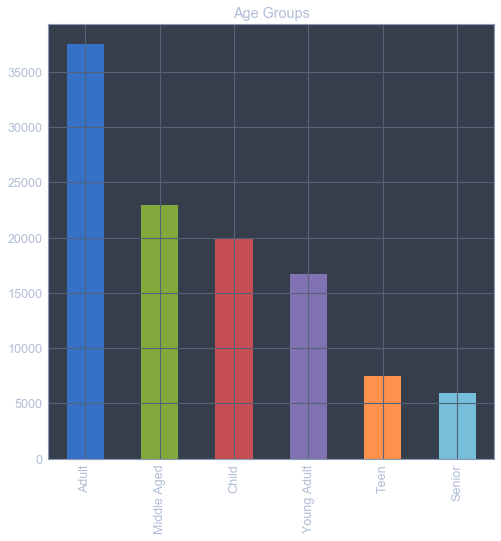

In [31]:
Ages = df.Age_Groups.value_counts()
Ages
Ages.plot(kind='bar', title='Age Groups', figsize = (8,8));

<p>The bar chart above shows that patients in the Adult age category (30-54 years) were the most likely to have an appointment scheduled. The next group with the most appointments were patients in the Middle Aged category (55-74 years), but followed closely by the Child age category (0-11 years). Teens (12-17 years) and surprisingy, Seniors (75-119 years), were the least likely to have appointments.</p>

#### Age and Appointment Attendance

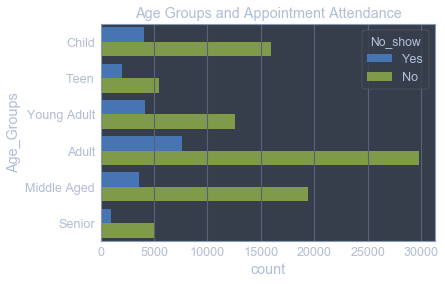

In [32]:
Age_No_Show = sns.countplot(y=df.Age_Groups, hue=df.No_show)
Age_No_Show.set_title('Age Groups and Appointment Attendance');

<p>The histogram count plot shows that patients in the Adult age category arrived at their appointment by the widest margin. Patients who are Middle Aged or Children are the next groups likely to show up to their appointment. This makes sense since these age groups hold the majority of appointments scheduled. In terms of which age groups did not show up to their appointments, Adults do have the greatest amount, followed by Children and Young Adults.</p>

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Medical Conditions

In [33]:
df['Alcoholism'].describe()
#df['Hypertension'].describe()
#df['Diabetes'].describe()

count    110521.000000
mean          0.030401
std           0.171690
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Alcoholism, dtype: float64

In [78]:
#Combining hyertension, alcoholism, and diabetes into a broader catgory called Medical Condition
df['Medical_Condition'] = df.Hypertension + df.Diabetes + df.Alcoholism
df.Medical_Condition.value_counts()

0    85306
1    17582
2     7377
3      256
Name: Medical_Condition, dtype: int64

In [79]:
#Getting counts of patients with a medical condition 
df['Medical_Condition'].replace(to_replace=[2,3], value=1, inplace=True)
df.Medical_Condition.value_counts()

0    85306
1    25215
Name: Medical_Condition, dtype: int64

In [85]:
#Getting percentages
df.Medical_Condition.value_counts('Medical_Condition') *100

0    77.185331
1    22.814669
Name: Medical_Condition, dtype: float64

In [81]:
Med = df['Medical_Condition'].value_counts()

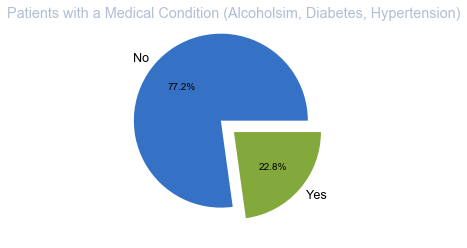

In [82]:
#Plot medical concerns with a pie chart
condition = Med
labels = ['No', 'Yes']
explode = (0.2, 0)

plt.pie(condition, labels = labels, explode = explode, autopct= '%1.1f%%', counterclock=True, textprops={'color':'black'});
plt.title('Patients with a Medical Condition (Alcoholsim, Diabetes, Hypertension)');

<p>A majority of patients do not have a medical concern (around 77%).</p>

#### Medical Conditions and Appointment Attendance

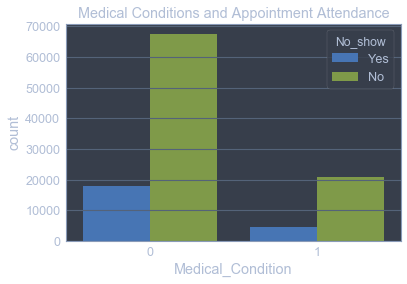

In [86]:
Med_No_Show = sns.countplot(x=df.Medical_Condition, hue = df.No_show)
Med_No_Show.set_title('Medical Conditions and Appointment Attendance');

<p>The majority of patients do not have a medical condition (alcoholism, diabetes, or hypertension), and the majority of those patients showed up to their appointments. Overall this isn't surprising. The patients with a medical condition were more likely to show up to their appointment as well. The patients without a medical condition were more likely to be a no show than patients with a medical condition.</p>

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Technology Usage

In [40]:
df.SMS_received.describe()

count    110521.000000
mean          0.321043
std           0.466879
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: SMS_received, dtype: float64

In [41]:
Text = df.SMS_received.value_counts()
Text

0    75039
1    35482
Name: SMS_received, dtype: int64

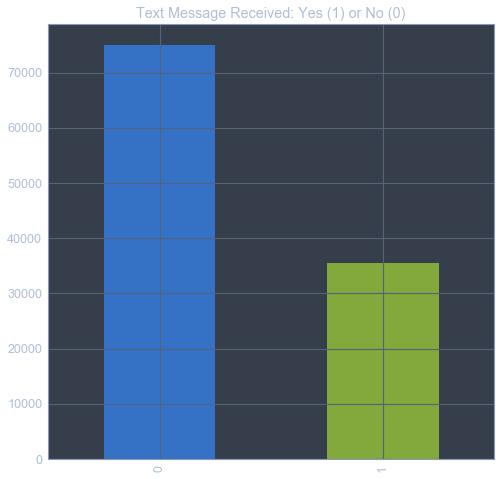

In [42]:
Text.plot(kind='bar', title = 'Text Message Received: Yes (1) or No (0)', figsize=(8,8));

In [43]:
Text_Percent = df.SMS_received.value_counts('SMS_received')*100
Text_Percent

0    67.895694
1    32.104306
Name: SMS_received, dtype: float64

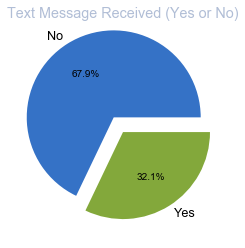

In [63]:
#Showing data in a pie chart
percent = Text_Percent
labels = ['No', 'Yes']
explode = (0.2, 0)

plt.pie(percent, labels = labels, explode = explode, autopct= '%1.1f%%', counterclock=True, textprops={'color':'black'});
plt.title('Text Message Received (Yes or No)');

<p>A majority of patients did not receive a text message prior to their appointment.</p>

#### Technology Usage and Appointment Attendance

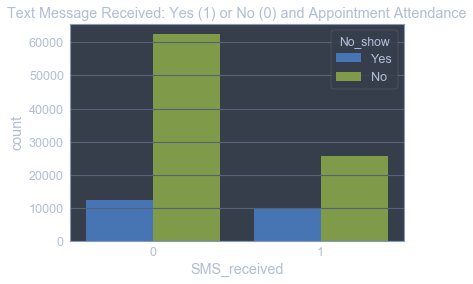

In [45]:
Text_No_Show = sns.countplot(x=df.SMS_received, hue = df.No_show)
Text_No_Show.set_title('Text Message Received: Yes (1) or No (0) and Appointment Attendance');

<p>The majority of patients who did not receive a text message for their appointment, showed up for their appointment. Even those patients who did receive a text message showed up to their appointment. Those who did not receieve a text were more likely to be a no show by a narrow marigin over those who did receive a text message.</p>

******

<a id='conclusions'></a>
## Conclusions

<p>In conclusion, I observed the following regarding each category of data:</p>
<ul>
    <li>Total No Show Percentage: total no show appointments is far less than the number of appointments that patients did attend. There are a multitude of factors that play into this trend including those that were analyzed in this report (gender, age, wait time, medical conditions, and technology usage) and factors that weren't represented in this data set (patient income, distance between neighborhood and the hospital, hospital monetary/time/personnel resources, and transportation to name a few).</li>
    <li>Gender: females make up 65% of total appointments scheduled, and were more likely to show up for those appointments compared to males. Out of the patients who did not show up for their appointment, females were more likely than males to be a no show. </li>
    <li>Appointment Wait Time: over half of total appointments were scheduled on the same day, or within 1-7 days. A majority of those same day appointments resulted in attendance, which is interesting when considering this is lowest possible amount of time passing between scheduling an appointment and attending it. Patients were also likely to attend their appointment when they scheduled it in the 15-30 day range. Patients were the least likely to not show up to their appointment when it was scheduled in the 1-7 day range.</li>
    <li>Age: patients in the adult age catefory (ages 30-54 years) were the least likely to arrive at their appointment. Teens (ages 12-17 years) and seniors (ages 75-119 years) had the lowest amount of total appointments, but teens were more likely than seniors to show up at their appointment.</li>
    <li>Medical Conditions: 77% of patients in this dataset do not have a medical condition (alcoholism, diabetes, or hypertension), and they were also more likely to show up to their appointments, but they were also more likely to be no shows when compared to those who had a medical condition(s).</li>
    <li>Technology Usage: the majority of patients who did not receive a text message for their appointment still attended their appointments. Those patients who did receive a text message were also showed up to their appointments more than no shows.</li>
</ul>
<p>I chose to not analyze the neighborhood, the handicap, or the scholarship data in this analysis because I felt there was not enough information to draw significant conclusions from, and concerns over my analysis being too speculative.</p>
<p>My analysis is limited in the fact that I primarly compared different data categories to only the no show data, and did not compare the data categories against each other. I felt this was a secondary priority of my analysis and decided to only focus on the variety of factors that could result in an appointment no show.</p>

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<a id='resources'></a>
    
## Resources
<p>The following is a list of resources I used during this project:</p>

<ul>
    <li><a href="https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed">Markdown for Jupyter Notebooks</a></li>
    <li><a href="https://patientengagementhit.com/news/patient-education-scheduling-fixes-shrink-patient-no-show-rates">Patient Education, Scheduling Fixes Shrink Patient No-Show Rates</a></li>
    <li><a href="https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html">Working with Time Series</a></li>
    <li><a href="https://seaborn.pydata.org/tutorial/distributions.html">Visualizing the distribution of a dataset</a></li>
    <li><a href="https://seaborn.pydata.org/generated/seaborn.countplot.html">Seaborn Countplot</a></li>
    <li><a href="https://www.kaggle.com/joniarroba/noshowappointments/home">Kaggle - Medical Appointment No Shows</a></li>
    <li><a href="https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py">Basic Pie Chart - Matplotlib</a></li>
</ul>



## Table of Contents (again)
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>